In [9]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

# Read in data

In [16]:
pathlist = Path('Data/').glob('**/*.csv')
data = []
for path in pathlist:
    path_in_str = str(path)
    data.append(pd.read_csv(path_in_str))
    data[-1]['source'] = path_in_str.split('/')[1].split('_articles')[0]
    print(data[-1].head())
    print('-'*100)

   Unnamed: 0                                              Title  \
0           0  International Coalition of Medicines Regulator...   
1           1  Availability of medicines during COVID-19 pand...   
2           2      Public-health advice during COVID-19 pandemic   
3           3          EMA’s governance during COVID-19 pandemic   
4           4      Public-health advice during COVID-19 pandemic   

                                                Link  \
0  https://www.ema.europa.eu/en/partners-networks...   
1  https://www.ema.europa.eu/en/human-regulatory/...   
2  https://www.ema.europa.eu/en/human-regulatory/...   
3  https://www.ema.europa.eu/en/human-regulatory/...   
4  https://www.ema.europa.eu/en/human-regulatory/...   

                                            Abstract PublishedDate  \
0  EMA endorsed a joint statement by the members ...      28 April   
1  EMA provided an update on the measures EU auth...      24 April   
2  EMA and the national competent authoritie

# Initial exploration data

In [17]:
[source.info() for source in data]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     41 non-null     int64 
 1   Title          41 non-null     object
 2   Link           41 non-null     object
 3   Abstract       41 non-null     object
 4   PublishedDate  41 non-null     object
 5   MoreInfoLink   41 non-null     object
 6   source         41 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     51 non-null     int64  
 1   Type           51 non-null     object 
 2   Title          51 non-null     object 
 3   Link           50 non-null     object 
 4   Authors        47 non-null     object 
 5   Abstract       51 non-null     object 
 6   Pu

[None, None, None, None]

       source nb_publ
0        emea      41
1        nejm      51
2      pubmed      10
3  the_lancet      43


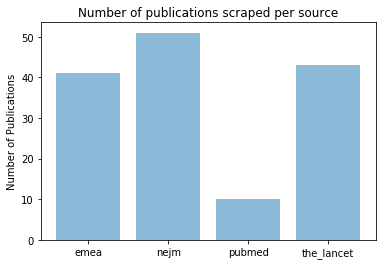

In [18]:
publ_per_source = pd.DataFrame(columns= ['source','nb_publ'])
for data_source in data:
    publ_per_source = publ_per_source.append({'source': data_source.source[0], 'nb_publ': len(data_source.index)}, ignore_index=True)

print(publ_per_source)

#barchart
y_pos = np.arange(len(publ_per_source))
plt.bar(y_pos, publ_per_source.nb_publ, align='center', alpha=0.5)
plt.xticks(y_pos, publ_per_source.source)
plt.ylabel('Number of Publications')
plt.title('Number of publications scraped per source')

plt.show()

No handles with labels found to put in legend.


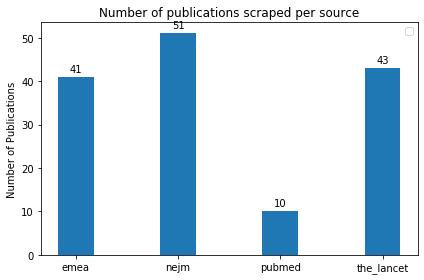

In [22]:
sources = publ_per_source.source
counts = publ_per_source.nb_publ

x = np.arange(len(sources))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, counts, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Publications')
ax.set_title('Number of publications scraped per source')
ax.set_xticks(x)
ax.set_xticklabels(sources)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)

fig.tight_layout()

plt.show()